<H3> Question 1 </H3>
<H5> We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset given below. </H5>

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TMax = np.array([ 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
TMin = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
Months = np.arange(12)

In [3]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, Months,TMax, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, Months,TMin, [-40, 20, 0])

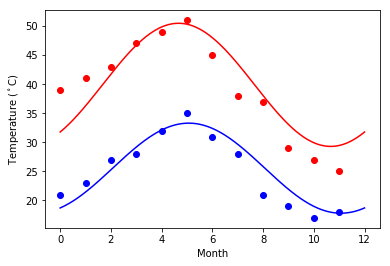

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(Months, TMax, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(Months, TMin, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

<H2> Question 2 </H2>

<H3> This assignment is for visualization using matplotlib: </H3>

In [5]:
import pandas as pd


In [6]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [7]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<H5> 1. Create a pie chart presenting the male/female proportion </H5>

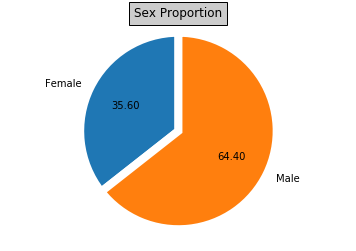

In [8]:
proportion = titanic.groupby(['sex']).size()
pieLabels ='Female','Male'
figureObject, axesObject = plt.subplots()
axesObject.pie(proportion,labels=pieLabels,autopct='%1.2f',startangle=90,wedgeprops   = { 'linewidth' : 8,'edgecolor' : "white"})
plt.title("Sex Proportion", bbox={'facecolor':'0.8', 'pad':5})
axesObject.axis('equal')
plt.show()


<H5> 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender </H5>

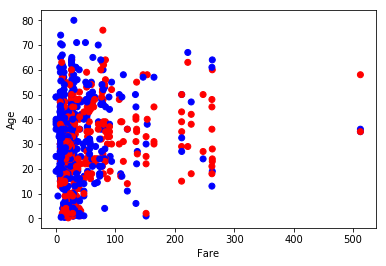

In [27]:
plt.xlabel('Fare')
plt.ylabel('Age')

titanic = titanic.dropna(subset=['sex'])

mapping = {'male' : 'blue', 'female' : 'red'}
c = titanic['sex'].map(mapping)
plt.scatter(titanic['fare'],titanic['age'],c=c)
plt.show()